In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import calendar

In [22]:
%load_ext rpy2.ipython

In [23]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [3]:
desired_stations_dictionary = {'16th Street Mission': 'Mission' , '24th Street Mission':'Mission', 'Embarcadero' :'Financial District/South Beach', 'Montgomery Street':'Financial District/South Beach', 'Powell Street':'Financial District/South Beach', 'Civic Center':'Tenderloin', 'Glen Park':'Glen Park', 'Balboa Park': 'Oceanview/Merced/Ingleside'}
neighborhood_ls = list(desired_stations_dictionary.values())

In [4]:
df_crime_2019=pd.read_csv('Safety_on_bart/crime_2019.csv', parse_dates=['Incident Datetime'])

# the crux of merging. Neighborhoods are carefully selected and named so that crime and bart neighborhoods match.

df_sorted_crime = df_crime_2019.loc[(df_crime_2019['Analysis Neighborhood'].isin(neighborhood_ls))]

crimes_of_interest = ["Lost Property", "Assault", "Robbery", "Drug Offense", "Disorderly Conduct", "Arson", "Weapons Carrying Etc", "Weapons Offense", "Sex Offense", "Stolen Property"]
#, "Weapons Offence"

# interested in only weekday data with the list of crimes_of_interest

df_sorted_crime_for_merging = df_sorted_crime.loc[(df_sorted_crime['Incident Category'].isin(crimes_of_interest))]

In [141]:
# Loading Bart Data

In [5]:
dfbart = pd.read_csv('bart_data.csv')

In [142]:
# extracting month column from data

In [14]:
dfbart['month']=dfbart['filename'].apply(lambda x: x.split(".")[0][-1])

In [143]:
# make 4 data frames for average weekeday, average Saturday, and average Sunday for graphing

In [26]:
dfSaturday = dfbart_by_month.loc[(dfbart_by_month['tabname']=='Avg Saturday OD')]

In [66]:
dfSunday = dfbart_by_month.loc[(dfbart_by_month['tabname']=='Avg Sunday OD')]

In [29]:
dfWeekday = dfbart_by_month.loc[(dfbart_by_month['tabname']=='Avg Weekday OD')]

In [19]:
dfbart_by_month = dfbart.groupby(['month', 'tabname']).agg({'Exits':'mean'}).reset_index()

In [144]:
# create month matched to numerical representation of month by graphing

In [145]:
month_dict={"1":"January", "2":"February","3":"March", "4":"April", "5":"May", "6":"June", "7":"July", "8":"August" }

In [146]:
dfSunday['month_name']=dfSunday['month'].map(month_dict)
dfSaturday['month_name']=dfSaturday['month'].map(month_dict)
dfWeekday['month_name']=dfWeekday['month'].map(month_dict)
dfTotal['month_name']=dfTotal['month'].map(month_dict)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [147]:
month_name = ['January','February','March','April','May','June','July','August']
dfSunday.month_name = dfSunday.month_name.astype(pd.api.types.CategoricalDtype(categories=month_name, ordered = True), )
dfSaturday.month_name = dfSaturday.month_name.astype(pd.api.types.CategoricalDtype(categories=month_name, ordered = True), )
dfWeekday.month_name = dfWeekday.month_name.astype(pd.api.types.CategoricalDtype(categories=month_name, ordered = True), )
dfTotal.month_name = dfWeekday.month_name.astype(pd.api.types.CategoricalDtype(categories=month_name, ordered = True), )

In [148]:
%R -i dfSunday
%R -i dfWeekday
%R -i dfTotal
%R -i dfSaturday

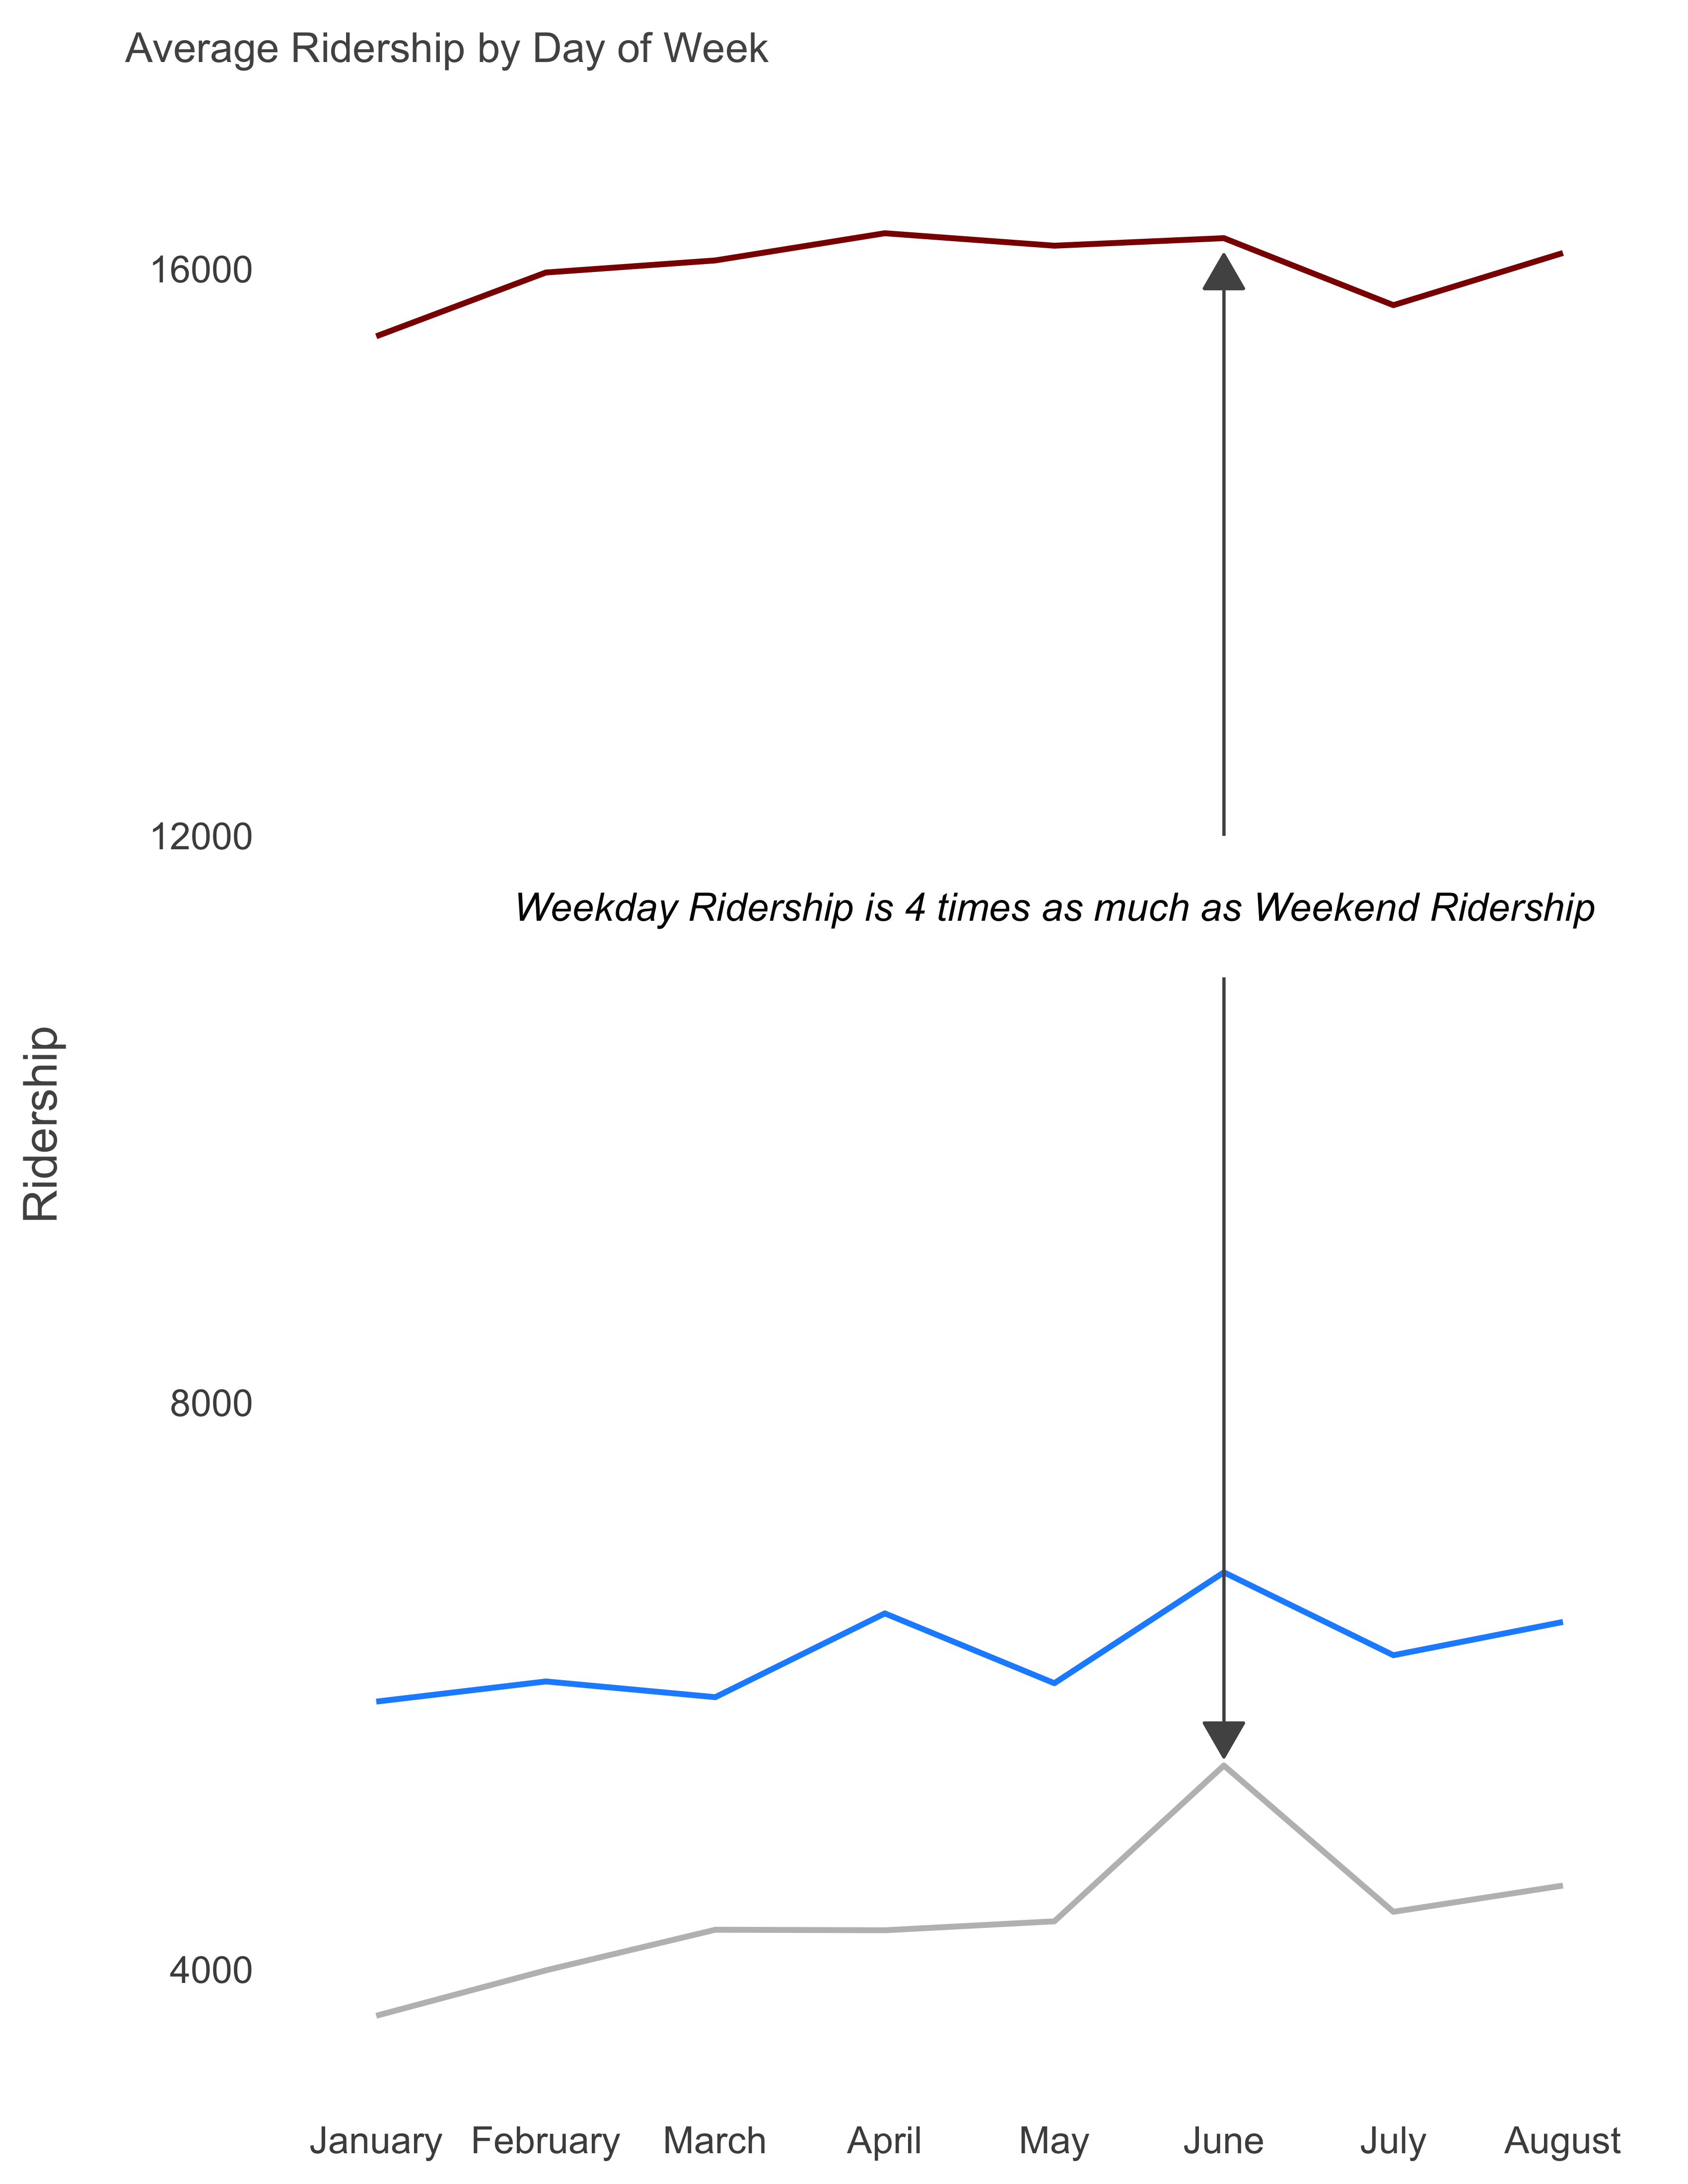

In [154]:
%%R  -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_line(aes(x=month_name, y = Exits, group = 1), data = dfSunday, color = 'grey', size = 1) +
geom_line(aes(x=month_name, y = Exits, group = 1), data = dfWeekday, color = 'red4', size = 1) +
geom_line(aes(x=month_name, y = Exits, group = 1), data = dfSaturday, color = 'dodgerblue', size = 1) +
ylab('Ridership') +
geom_segment(aes(x = factor('June'), y = 12000, yend = 16100, xend = factor('June') ), data = dfWeekday, colour = "grey32", arrow = arrow(length = unit(0.5, "cm"), type="closed")) +
geom_segment(aes(x = factor('June'), y = 11000, yend = 5500, xend = factor('June') ), data = dfWeekday, colour = "grey32", arrow = arrow(length = unit(0.5, "cm"), type="closed")) +
annotate("text", x = 'May', y = 11500, label = "Weekday Ridership is 4 times as much as Weekend Ridership", fontface = "italic",size=5,color="grey2")+
theme_classic(base_size=17) +
theme(axis.line=element_blank(), axis.ticks=element_blank(), axis.title.x=element_blank(),
      axis.title.y = element_text(margin = margin(t = 0, r = 30, b = 0, l = 0), colour = "grey32"), plot.title = element_text(hjust=-.2,vjust = 0, colour='grey32', size=15, margin=margin(0,0,30,0))) +
ggtitle("Average Ridership by Day of Week")



In [155]:
%%R
ggsave('/Users/maxine/Documents/GitHub/Visualization/Graph5_rider.pdf', units = 'in', width = 6, height = 4)